2.51897096634


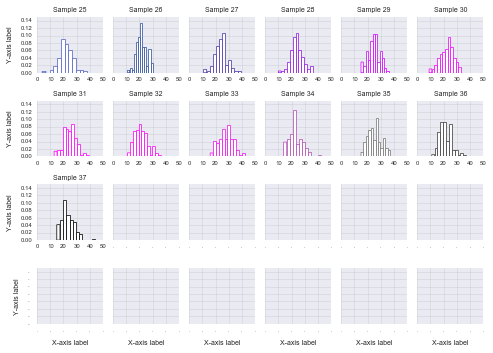

In [143]:
%matplotlib inline

    from __future__ import print_function
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    import seaborn as sns
    import timeit
    from matplotlib.backends.backend_pdf import PdfPages

    sns.set(font_scale=0.0)
    n, m = 4, 6
    datasize = 37
    ctheme = ['k', 'gray', 'magenta', 'fuchsia', '#be03fd', '#1e488f', 
              (0.44313725490196076, 0.44313725490196076, 0.88627450980392153),
              '#75bbfd', 'teal', 'lime', 'g', (0.6666674, 0.6666663, 0.29078014184397138), 
              'y', '#f1da7a',  'tan','orange', 'maroon', 'r'] 
    colors = sns.blend_palette(ctheme, datasize)
    fz = 7 # labels fontsize

    def new_page(n, m):
        global splot_index 
        splot_index = 0  
        fig, axarr = plt.subplots(n, m, sharey='row')
        plt.subplots_adjust(hspace=0.5, wspace=0.15)
        arr_ij = [(x,y) for x,y in np.ndindex(axarr.shape)]
        subplots = [axarr[index] for index in arr_ij]
        for s,splot in enumerate(subplots):
            splot.grid(b=True, which='major', color='gray', linestyle='-', 
                       alpha=0.25, zorder=1, lw=0.5)
            splot.set_ylim(0,.15)
            splot.set_xlim(0,50)
            last_row = ( n*m-s < m+1 )
            first_in_row = ( s % m == 0 )
            if last_row:
                splot.set_xlabel("X-axis label", labelpad=8, fontsize=fz)
            if first_in_row:
                splot.set_ylabel("Y-axis label", labelpad=8, fontsize=fz)
        return(fig, subplots)


    with PdfPages('auto_subplotting_colors.pdf') as pdf:
        start_time = timeit.default_timer()
        fig, subplots = new_page(n, m)

        for sample in xrange(datasize):
            splot = subplots[splot_index]
            splot_index += 1
            scaled_y = np.random.randint(20,30)
            random_data = np.random.poisson(scaled_y, 100)
            splot.hist(random_data, bins=12, normed=True, zorder=2, alpha=0.99,
                       fc='white', lw=0.75, ec=colors.pop()) 
            splot.set_title("Sample {}".format(sample+1), fontsize=fz)
            # tick fontsize & spacing
            splot.xaxis.set_tick_params(pad=4, labelsize=6)
            splot.yaxis.set_tick_params(pad=4, labelsize=6)

            # make new page:
            if splot_index == n*m:
#                 pdf.savefig()
#                 plt.close(fig)
                plt.show()
                print(timeit.default_timer()-start_time)
                start_time = timeit.default_timer()
                fig, subplots = new_page(n, m)

        if splot_index > 0:
#             pdf.savefig()
#             plt.close(f)
            plt.draw()

